In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math
from matplotlib import pyplot as plt
#To calculate area below the normal distribution and calculate probabilities
from numpy import trapz 
from scipy.integrate import simps


Projection vectorielle
https://www.youtube.com/watch?v=uV5hmpzmWsU (on fait cet exo. a partir du temps: 46:20)

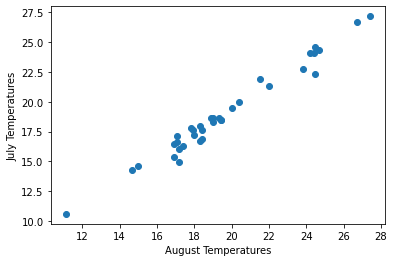

Correlation between June and July temperatures: 0.9869777062171075


In [115]:
# Step 1: (attention que des donnees quantitatives ici)
# Soit notre dataset d'origine. une representation spatiale de nos donnes signifierait: chaque axe = une variable
# l'objectif est de reduire le nombre d'axes afin je pense de pouvoir representer visuellement le dataset, de le representer de facon plus comprehensible que un dataset de nombres...
    # (essaie de trouver une explication un peu plus bulletproof qd meme lol). 

# Dans le cas present, on dispose du dataset suivant: 

df = pd.read_csv("PCA/dataTemperature.csv", index_col=0)
df.head()


# Alright, so some columns (aka variables, aka measures) in this dataset can be very similar.
# Here, we're analyzing seasonal temperatures acorss the year (the variables are months average temperature over the past 30 yrs). 
# In this very academic/basic example, it's easy to see which variable are going to be strongly correlate:
    # 2 months of the same season will have slightly or really similar temperatures..
    # 2 consecutive months will have REALLY similar temperature values.    
# To assert this statement, let's just visualize the correlation between the temperature in July and the those of August:

JulyData = df.loc[:, 'Juillet'] 
AugustData = df.loc[:, 'Aout'] 
plt.scatter(JulyData, AugustData)
plt.ylabel('July Temperatures')
plt.xlabel('August Temperatures')
plt.show()

# On voit bien que la correlation est tres forte ici, on peut egalement calculer le coefficient de correlation pour s'en assurer:
Correlation = df["Juillet"].corr(df["Aout"])
print("Correlation between June and July temperatures: "+str(Correlation))

    

In [116]:
# Almost equal to one aka: the perfect linear correlation...
# Maybe keeping all the months is not necessary, we might wanna remove extra data from month from the same season...
# Here's the correlation matrice to check for the correlations between all the months temperature data: (We're just playing for now, in reality you're supposed to centrer reduire the data before using this covariance matrix, but again, we're just playing for now. Serious things come later...) 
# here the classic way of calculating this correlation matrix
correlation_matrix = df.corr()
correlation_matrix



,Janvier,Fevrier,Mars,Avril,Mai,Juin,Juillet,Aout,Septembre,Octobre,Novembre,Decembre
Janvier,1.000000,0.960678,0.929517,0.795425,0.600508,0.519536,0.530671,0.607108,0.778687,0.886807,0.943886,0.974064
Fevrier,0.960678,1.000000,0.979234,0.880322,0.692248,0.624316,0.623449,0.690978,0.850389,0.929754,0.973033,0.982687
Mars,0.929517,0.979234,1.000000,0.945193,0.795494,0.720126,0.715969,0.778780,0.909998,0.963907,0.973366,0.956256
Avril,0.795425,0.880322,0.945193,1.000000,0.943473,0.888865,0.862852,0.895332,0.968721,0.962087,0.922591,0.850558
Mai,0.600508,0.692248,0.795494,0.943473,1.000000,0.973744,0.942099,0.939327,0.940632,0.876653,0.789886,0.675705
Juin,0.519536,0.624316,0.720126,0.888865,0.973744,1.000000,0.983589,0.964756,0.928217,0.833450,0.736855,0.607509
Juillet,0.530671,0.623449,0.715969,0.862852,0.942099,0.983589,1.000000,0.986978,0.931982,0.837805,0.738681,0.615742
Aout,0.607108,0.690978,0.778780,0.895332,0.939327,0.964756,0.986978,1.000000,0.961030,0.885057,0.792766,0.679252
Septembre,0.778687,0.850389,0.909998,0.968721,0.940632,0.928217,0.931982,0.961030,1.000000,0.974553,0.922297,0.839861
Octobre,0.886807,0.929754,0.963907,0.962087,0.876653,0.833450,0.837805,0.885057,0.974553,1.000000,0.980829,0.933839


In [91]:
# alright  so this is nice and does what we want, but it's not super readable lol... is it?? 
# just for fun, let's code a function that is going to "plot" that correlation matrix... in other words: plot temperatures for tuplets 
    #January-January; January-February; January-March....
    #February-January; February-February; February-March...
    #March-January; March-February; ....
    #I mean you get the idea right??
    
#with plots

def plotCorreclationMatrix(df):
    fig = plt.figure(figsize=(200,100))
    plot_pos_fig = 1
    plot_pos_y = 0
    for i in range(df.shape[1]):
        plot_pos_x = i
        x_values = df.iloc[:,i]
        for j in range(df.shape[1]):
            plot_pos_y = j
            y_values = df.iloc[:,j]
            # arguments are the following: plt.subplot(#_lines, #_rows, positionID)
            plt.subplot(12, 12, plot_pos_fig)
            plt.scatter(x_values, y_values)
            plot_pos_fig = plot_pos_fig+1
        
        
plotCorreclationMatrix(df)        




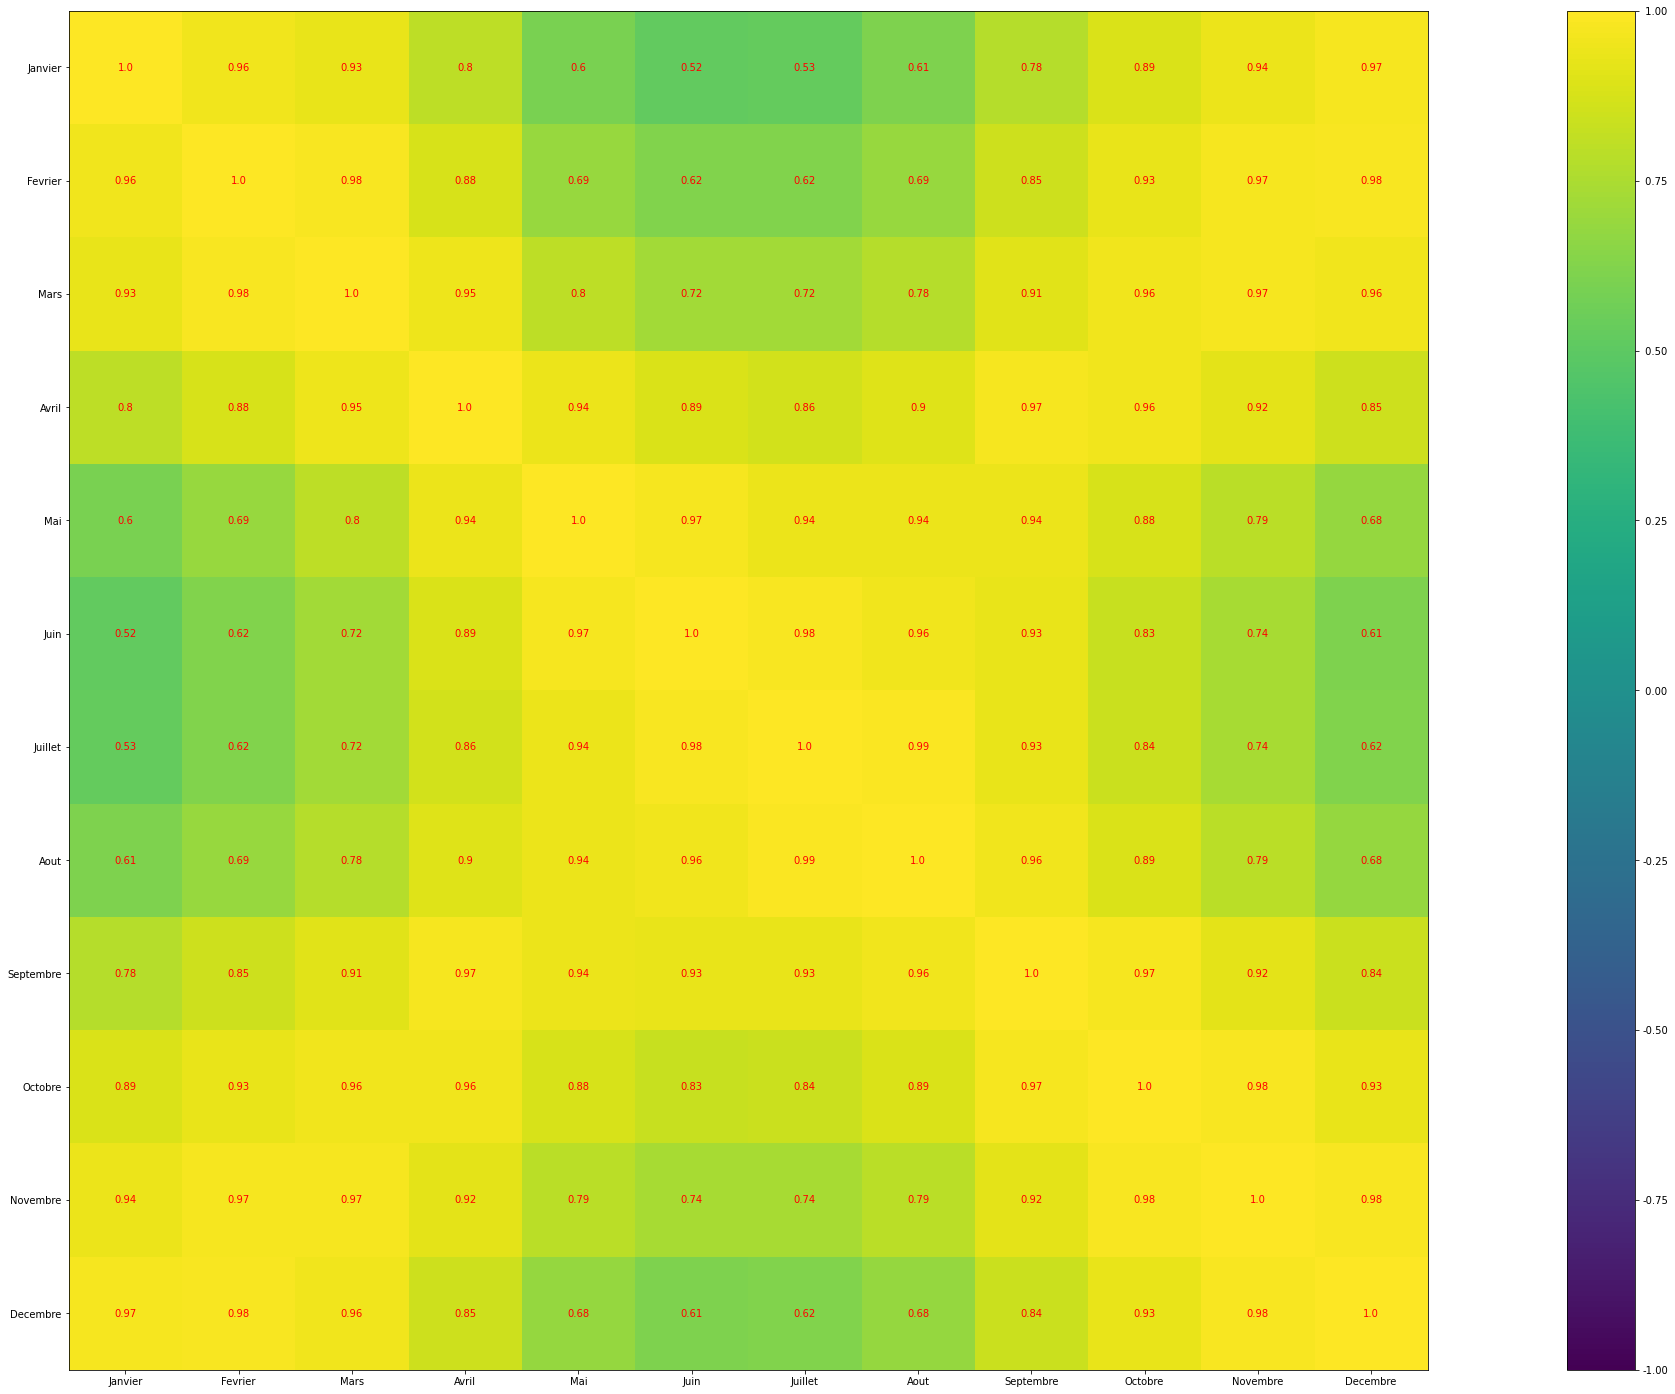

In [155]:
# A buuuuunch of stuffs need to be added here lol... but I hope you get where I am trying to go with this lol
    # I just wanted to actually "plot" the matrix correlation myself if that makes sense lol
    # but yeah, among the few stuff I can think of that are going to need some cleaning here:
        # make the dots MUCH more visible
        # add month names (only on the sides tho... maybe think of a condition on i and add the x or y label only on the first iteration of the loop...)
        
# but yeah, moving on, if we're still trying to represent this correlation matrix here's something from python library that does it in a clean way with some kind of heatmap... 
# the closer the correlation would get to 1 the more we'd have a matrix "cell" with a specific color...
# first step is just to get the correlation matrix calculated earlier: (you round it so that it's easier for the heat map to process it...)
correlation_matrix = df.corr()
correlation_matrix = correlation_matrix.round(2)


fig, ax = plt.subplots(figsize=(50,25))
im = ax.imshow(correlation_matrix)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11), 
             ticklabels=('Janvier', 'Fevrier', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Aout', 'Septembre', 'Octobre', 'Novembre', 'Decembre'))
ax.yaxis.set(ticks=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11), 
             ticklabels=('Janvier', 'Fevrier', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Aout', 'Septembre', 'Octobre', 'Novembre', 'Decembre'))

# I gotta switch this back to a numpy array so that I can use it in the for loop below...
correlation_matrix = correlation_matrix.to_numpy()
for i in range(12):
    for j in range(12):
        a=0
        ax.text(j, i, correlation_matrix[i, j], ha='center', va='center', color='r')

cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()




In [ ]:
# Ok so this already looks waaaay better... we can still add/remove some stuff to make this prettier... among those stuffs:
    # Maybe find the way to put the 'ticks' (with the month names) on top of the matrix rather than below...

In [ ]:
# [TO BE DONE]
# to prove that this matrix works fine, we can plot the correlation for: 
    # xxx and xxx month that have a negative correlation
    # xxx and xxx month that have a positive correlation

# [TO BE DONE]
    

# We know that we can use certain variables (certain months), to represent all the months from the same season (or month that have temperatures mathematically related: opposite temperatures for example...). 
# ATTENTION:
# L'on pourrait facilement tomber dans le piege de dire que l'ACP, c'est juste supprimer/fusionner les colonnes simillaires.
# C'est possible dans cet exemple car il s'agit d'un "dummy example". En effet, on pourrait tres clairement conserver la quasi totalite de la variabilite du dataset ET en reduire la dimension par la procedure suivante:
    # we could just keep the temperature data of one month for each season (or let's say average temperature of summer months), and take a 4 dimension axis (3 usual x,y,z dimensions + dots size as the 4th dimensions) 
    # and this would pretty accurately represent all this data in 1 visualisation tho...
    # Take a look at this:

# [TO BE DONE]

#Il tient cependant a garder en tete que cela n'est certainement pas valable de maniere generale, sur d'autres types d'examples...
    # En fait, il suffit d'ajouter un peu plus de variablite au sein des profils de temperature des individus (ne serait-ce que pour 1 seul d'entre eux) pour que les approximations sur lesquelles sont bases le schema ci dessus ne soient plus valables/possibles sans perte significative d'information ... (en effet dans ce contexte, 1 mois ne pourrait plus representer autant d'autres mois)
    # Ou tout simplement, avec la meme variabilite de profil chez les individus du dataset, avoir des variables dont l'interpretation est plus complexes... (ici il est facile de se rendre compte qu'on peut simplifier le jeu de donnees via la "critere saisonal", mais dans d'autres jeu de donnes, cet exercice, pourrait s'averer bien plus complex/voir impossible)
# Donc,l'ACP, c'est dire que: 
    # si l'on representait chaque individu (chaque "ville") du dataset par un point (ou un vecteur) dans un espace de dimension de depart eleve (au dela des 3-4 dimensions que l'on peut se representer visuellement) et l'ensemble du dataset par un nuage de points (ou un nuage de vecteurs) dans ce meme espace. 
    # En applatissant ce nuage (donc en le representant dans un nouvel espace de dimension plus faible que celui d'origine), l'on conserverait tout de meme autant que possible la variabilite des donnees d'origine. Reformulation: on ne perdrait pas d'information
    # Autrment dit: deux points (ou vecteurs) proches dans le nuage d'origine, devraient d'une maniere ou d'une autre le rester dans l'espace final.

# So, no matter if this example is not the best example, for the sake of simplicity we'll do the PCA on it anyways. And at the end, we'll compare our result to the simple figure plotted above to check how well we did/which method gives the most accurate result
# Ok let's keep going with PCA



In [ ]:
# Sum up: What's PCA in english? (answer: fewer number of columns for a given dataset without loosing information. Goal: plot multidemnsional data on simple visualisation)
    # So to get back to explain what we're doing here: PCA is an algorithm that will produce for our original dataset an entire new set of variables with a smaller dimension (other terminology for fewer columns)
    # Those new dimensions won't be correlated to each other. The original 12 variables probably won't be here anymore, but the new ones will hopefully carry as much information of the original data as possible
    # So that's the idea behind ACP, fewer number of variables for as much information as possible...

# Sum up: How to achieve PCA? (answer: by projecting initial dataset on vectors caryying the most variation of our initial dataset)
    # Above was the "English" explanation for what we're about to do. Now, here comes the math part that'll explain HOW to actually do it!:
    # (Hey should I keep this sentence??) So, in our example dataset, we start with a space containing a number of N different "axes". Each axes symbolizes a variable of the dataset (so N goes from 1 to 12 in our exemple)
    # So the vectors of that space have all together a dimensionality D=12 (the # of column in our dataset) 
    # The goal here, is dimensional reduction. We want to map our initial space of dimensionality D=12 onto another space of dimensionality M with M<D (still following? just making stating facts here)
    # How are we going to do this mapping??
        # without getting to deep in the maths. what we'll do here, is that we'll project the vectors of our original space onto the M vectors of this new space.
        # but who are those vectors?? A good criteria for picking those vectors is the percentage of information from the original dataset these vectors can carry
        # In other words, you want to project your data onto vectors so that you can keep as much of the original variation of the data as you can
        # [TO BE DONE] (Maybe if you can, try to find a dummy example/vulgarisation so that, this rephrasing is also visual, like the example of the dromadaire in Guyader course)

# [TO BE DONE]Sum up: How to identify the vectors "with the most variation"? (answer: use the math formula)
    # We can identify mathematically who those vectors are (the ones that contains most of the original data variation). Here's the formula:
        # before talking about the formula: here's conceptually what we're doing here: we're taking the covariance matrix of our data set and multiplying it by vectors
        # what happens is that the result of that product gives you other vectors right? we can plot these resulting vectors in a 2 dimensional space
        # and if we take each individuals of our dataset and project their coordinates across all dimensions of the original space onto that resulting vector, we get different spread for the data
        # [TO BE DONE] tho, if you can make a visualization of this... you're golden lol...
        
        # As you saw, depending on the vector you project the data on, you'll conserve more or less variation... that's the game: we want the vectors that have the highest ratio vfinale/vorigine
            # for a given covariance matrix S, the eighen vector and the eighen values associated to it, are given by the following formula:
            # eighen value: https://www.youtube.com/watch?v=deluOROra8U&list=PLBv09BD7ez_4InDh85LM_43Bsw0cFDHdN&index=9 around 
            # now that we have the eighen values, it's just a matter of equation solving: multiplying the covriance matrix S by an eighen vector will give you that same eighen vector * the eighen value
            # You know how matrix multiplication works, so the idea is that you get a system of equation. In our case a system of 12 equation. We're not gonna solve that lol
            # but long story short, "solving" that equation won't actually give you values. It'll just give you the multipliers to get one of those eighen vectors for the eighen value... so just do the math and get me those vectors... lol... then normalize it to get a unit vector...
            # Ok, we have the first eighen vector...
            # now you repeat that to get the second one
            # and again and again until the nth for the number of dimension you want...
            
            
        # but there's an infinite number of vectors in space right? are we gonna multiply aaaaalll of them by the covariance matrix??? naaa this is how you find those vectors
        
        # they're called eighen vectors (they don't move in space, they only get longer, but they point to the same direction... again, not gonna get into details here...)
        # [TO BE DONE]: Find the video that gives the clearest explanation for the formula and how to actually use it
        
    # [TO BE DONE]This formula will give you the vectors we're looking for. The mathematical demonstration for this formula is out of the scope of this analysis... but I can do it just for fun...
    # [TO BE DONE]Here's theorically how to use it in our example:
        # first we need to center the values in our dataset so that the means are the same across every dimensions
        # Maybe add these 2 videos to the resources you're alrady using that might help tho...
            # https://www.youtube.com/watch?v=QP43Iy-QQWY&feature=share&fbclid=IwAR25PnVjB61Uvu3X_q_Cb0rO131lNPmq0Bwz7yAVbTpxjUz50o6Oh0NAsOI
            # https://www.youtube.com/playlist?list=PLBv09BD7ez_4InDh85LM_43Bsw0cFDHdN&fbclid=IwAR2qI2UIyVzFb9vTj_joZAgFsDN48Urx24u2YzxeKGamZpPLMH4lL3OseuM
        
    # [TO BE DONE] Thank god, Python is easier to use... we'll just use xxx
    


    
# Conclusions:
# [TO BE DONE] Conclusion 1: a first rough conclusion We can see that in the first variability dimension/axis of our new plan these 2 cities are close, meaning they have somehow temperatures profiles really similars. And still on that same variability dimension, these 2 cities are pretty far apart, so they must have somehow pretty different temperature profiles. Fact that we can check in the dataset: 
    # - [TO BE DONE]by plotting them on an axis (x=month;y=temperature)
    # - [TO BE DONE]by calculating averages, variance and other exploratory stats about them...
    # - [TO BE DONE]from above result interpretation tell on which level these cites are similar or different. In our example .... [TO BE DONE]
# [TO BE DONE] Conclusion 2: based on the previous conclusion, we can say on the second variability dimension/axis of our new plan, these 2 cities are ....
    # - [TO BE DONE] do like above...

# [TO BE DONE] Conclusion final temp:
    # - alright, all that just to say that "nice is cooler" than paris c'mon, I don't need acp for that!
    # - I know lol... but this was just a dummy example. A good dummy example, because it allows us to quickly know how accurate this methode is
    # - So of course, this is not simply about stating which cities is the coolest/hottest. this is about having a tool that'll highlight the important components of a multidimentional dataset. and our example dataset is just a way to proove our tool works fine!
    # - this tool will have a real use in situations where interpretation would be more complex,   

# Ouverture:
# [TO BE DONE] Ok, so the little conclusions drawn from above are pretty cool/funny. And they showed us that our PCA tool worked as intended: reducing the dataset original dimension while keeping most of the datavariability.Now what? 
# we were only able to interpret the reason behind the difference of 2 points on our new axis because this dataset is easy to interpret. We all know XXX is different from xxxx and how XXX2 is different from XXX2 because we went there on vacation, or we've seen it on tv, or...
# But what if it was a more complext to interpret dataset? We need to be able to map these new Axes to the old ones.








In [ ]:
# Todo: 
# "HOW CAN A COLUMN BE CONSIDERED A VECTOR???" https://stats.stackexchange.com/questions/495458/how-can-a-column-in-a-dataset-be-considered-a-vector

In [ ]:
# ANNEX: Here are the vids I'm using: 
# "HOW CAN A COLUMN BE CONSIDERED A VECTOR???" https://stats.stackexchange.com/questions/495458/how-can-a-column-in-a-dataset-be-considered-a-vector
# trame continue: https://www.youtube.com/watch?v=dhK8nbtii6I 
# trame continue application direct (a partir du temps: 46:20): https://www.youtube.com/watch?v=uV5hmpzmWsU
# revision vid no1 (projection vectorielle): https://www.youtube.com/watch?v=X78tLBY3BMk
# revision vid no2 (Eigen values, eigen vectors): https://www.youtube.com/watch?v=glaiP222JWA
# revision vid no3 (lagrange multipliers): https://www.youtube.com/watch?v=6oZT72-nnyI
# revision vid no4 ("Derivative of matrix" not super clear in my mind... is it liked to transposee stuff?): https://www.youtube.com/watch?v=e73033jZTCI
# revision vid no5 ("Covariance matrix"): https://www.youtube.com/watch?v=152tSYtiQbw